In [1]:
import os,sys
import glob
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib  widget

In [2]:
# cropped area
x1 = 18000
x2 = 14000
y1 = 2100
y2 = 1000

dy = y1-y2
dx = x1-x2
print(dy,dx)

1100 4000


In [3]:
fileName = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/geom_reference/los.rdr.full'

f1 = gdal.Open(fileName, gdal.GA_ReadOnly)
incidence_angle = f1.GetRasterBand(1).ReadAsArray()
f1 = None

dyFull, dxFull = np.shape(incidence_angle)

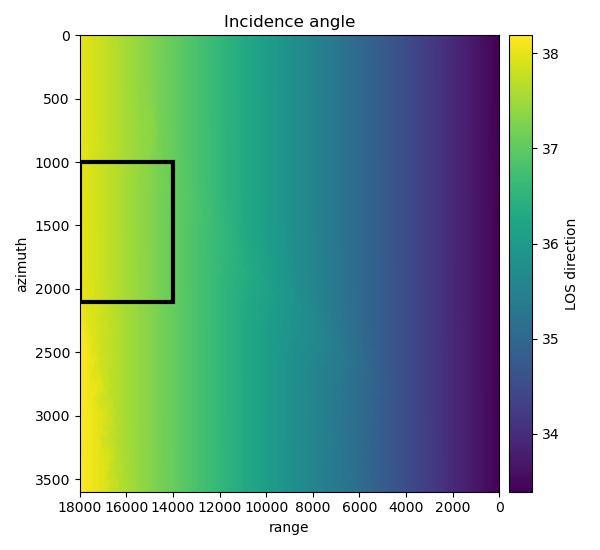

In [4]:
plt.figure(figsize=(6,5.5),tight_layout=True)
plt.imshow(incidence_angle, aspect='auto',interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='LOS direction')
plt.set_cmap('viridis')
plt.xlim([dxFull,0]); plt.ylim([dyFull,0])
plt.xlabel('range'); plt.ylabel('azimuth')
plt.title('Incidence angle')
plt.gca().add_patch(Rectangle((x2,y2),dx,dy,edgecolor='k',facecolor='none',lw=3))
plt.show()

In [13]:
synth_vert_disps = np.ones((dy,dx))*1.0
inc_angles_cropped = incidence_angle[y2:y1,x2:x1]

disp_LOS = synth_vert_disps/np.sin(np.deg2rad(inc_angles_cropped))

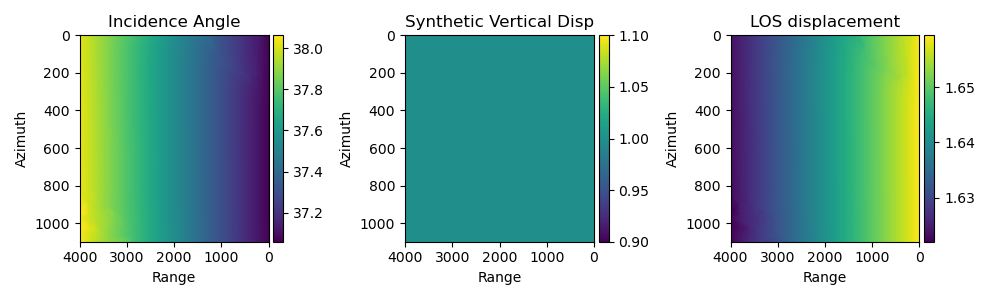

In [14]:
plt.figure(figsize=(10,3),tight_layout=True)
plt.subplot(1,3,1)
plt.imshow(inc_angles_cropped,cmap='viridis',aspect='auto',interpolation='nearest')
plt.colorbar(pad=0.02); plt.xlim(dx,0)
plt.xlabel('Range'); plt.ylabel('Azimuth'); plt.title('Incidence Angle')
plt.subplot(1,3,2)
plt.imshow(synth_vert_disps,cmap='viridis',aspect='auto',interpolation='nearest')
plt.colorbar(pad=0.02); plt.xlim(dx,0)
plt.xlabel('Range'); plt.ylabel('Azimuth'); plt.title('Synthetic Vertical Disp')
plt.subplot(1,3,3)
plt.imshow(disp_LOS,cmap='viridis',aspect='auto',interpolation='nearest')
plt.colorbar(pad=0.02); plt.xlim(dx,0)
plt.xlabel('Range'); plt.ylabel('Azimuth'); plt.title('LOS displacement')
plt.show()